In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사상구"
region_code = "11"
target_date = "2019-01-10"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사상구2019_1q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2019-01-10,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7860,사상구,8175,사상구,315,4.01%,"8,018"
1,2019-01-10,간장,오복왕표 0.9ℓ 1병,11900,사상구,11900,사상구,0,0.0%,"11,900"
2,2019-01-10,고등어,30㎝정도 500g 1마리,5813,사상구,6950,사상구,1137,19.56%,"6,382"
3,2019-01-10,달걀,오경슈퍼란60g정도 10개,2580,사상구,2690,사상구,110,4.26%,"2,635"
4,2019-01-10,닭고기,육계 1.0㎏,7990,사상구,9180,사상구,1190,14.89%,"8,585"
5,2019-01-10,대파,1.0㎏,3290,사상구,4257,사상구,967,29.39%,"3,774"
6,2019-01-10,돼지고기,삼겹살 500g,7450,사상구,8250,사상구,800,10.74%,"7,850"
7,2019-01-10,두부,500g 판두부(국산포장두부 420g) 1모,4253,사상구,4253,사상구,0,0.0%,"4,253"
8,2019-01-10,라면,신라면 120g 1봉지,676,사상구,676,사상구,0,0.0%,676
9,2019-01-10,맥주,하이트 500㎖ 1병,1400,사상구,1410,사상구,10,0.71%,"1,405"


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사상구"
region_code = "11"
target_date = "2019-04-04"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사상구2019_2q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2019-04-04,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7200,사상구,8175,사상구,975,13.54%,"7,688"
1,2019-04-04,간장,오복왕표 0.9ℓ 1병,11900,사상구,11900,사상구,0,0.0%,"11,900"
2,2019-04-04,고등어,30㎝정도 500g 1마리,5813,사상구,6650,사상구,837,14.4%,"6,232"
3,2019-04-04,달걀,오경슈퍼란60g정도 10개,2406,사상구,2690,사상구,284,11.8%,"2,548"
4,2019-04-04,닭고기,육계 1.0㎏,8580,사상구,8990,사상구,410,4.78%,"8,785"
5,2019-04-04,대파,1.0㎏,1828,사상구,2300,사상구,472,25.82%,"2,064"
6,2019-04-04,돼지고기,삼겹살 500g,7450,사상구,8400,사상구,950,12.75%,"7,925"
7,2019-04-04,두부,500g 판두부(국산포장두부 420g) 1모,4415,사상구,4415,사상구,0,0.0%,"4,415"
8,2019-04-04,라면,신라면 120g 1봉지,676,사상구,676,사상구,0,0.0%,676
9,2019-04-04,맥주,하이트 500㎖ 1병,1400,사상구,1410,사상구,10,0.71%,"1,405"


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사상구"
region_code = "11"
target_date = "2019-07-11"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사상구2019_3q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2019-07-11,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,사상구,11925,사상구,4500,60.61%,"9,675"
1,2019-07-11,간장,오복왕표 0.9ℓ 1병,11900,사상구,11900,사상구,0,0.0%,"11,900"
2,2019-07-11,갈치,60cm정도 500g 1마리(냉동),8176,사상구,11940,사상구,3764,46.04%,"10,058"
3,2019-07-11,고등어,30㎝정도 500g 1마리,5813,사상구,6650,사상구,837,14.4%,"6,232"
4,2019-07-11,달걀,오경슈퍼란60g정도 10개,2690,사상구,2780,사상구,90,3.35%,"2,735"
5,2019-07-11,닭고기,육계 1.0㎏,7990,사상구,9333,사상구,1343,16.81%,"8,662"
6,2019-07-11,대파,1.0㎏,2900,사상구,4114,사상구,1214,41.86%,"3,507"
7,2019-07-11,돼지고기,삼겹살 500g,8400,사상구,8450,사상구,50,0.6%,"8,425"
8,2019-07-11,두부,500g 판두부(국산포장두부 420g) 1모,4100,사상구,4415,사상구,315,7.68%,"4,258"
9,2019-07-11,라면,신라면 120g 1봉지,676,사상구,3080,사상구,2404,355.62%,"1,878"


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사상구"
region_code = "11"
target_date = "2019-10-24"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사상구2019_4q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2019-10-24,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6375,사상구,9666,사상구,3291,51.62%,"8,021"
1,2019-10-24,간장,오복왕표 0.9ℓ 1병,11900,사상구,11900,사상구,0,0.0%,"11,900"
2,2019-10-24,갈치,60cm정도 500g 1마리(냉동),8500,사상구,10680,사상구,2180,25.65%,"9,590"
3,2019-10-24,고등어,30㎝정도 500g 1마리,5125,사상구,5391,사상구,266,5.19%,"5,258"
4,2019-10-24,달걀,오경슈퍼란60g정도 10개,2690,사상구,3020,사상구,330,12.27%,"2,855"
5,2019-10-24,닭고기,육계 1.0㎏,7990,사상구,9900,사상구,1910,23.9%,"8,945"
6,2019-10-24,대파,1.0㎏,3475,사상구,3490,사상구,15,0.43%,"3,483"
7,2019-10-24,돼지고기,삼겹살 500g,7450,사상구,8900,사상구,1450,19.46%,"8,175"
8,2019-10-24,두부,500g 판두부(국산포장두부 420g) 1모,4415,사상구,4531,사상구,116,2.63%,"4,473"
9,2019-10-24,라면,신라면 120g 1봉지,676,사상구,3380,사상구,2704,400.0%,"2,028"


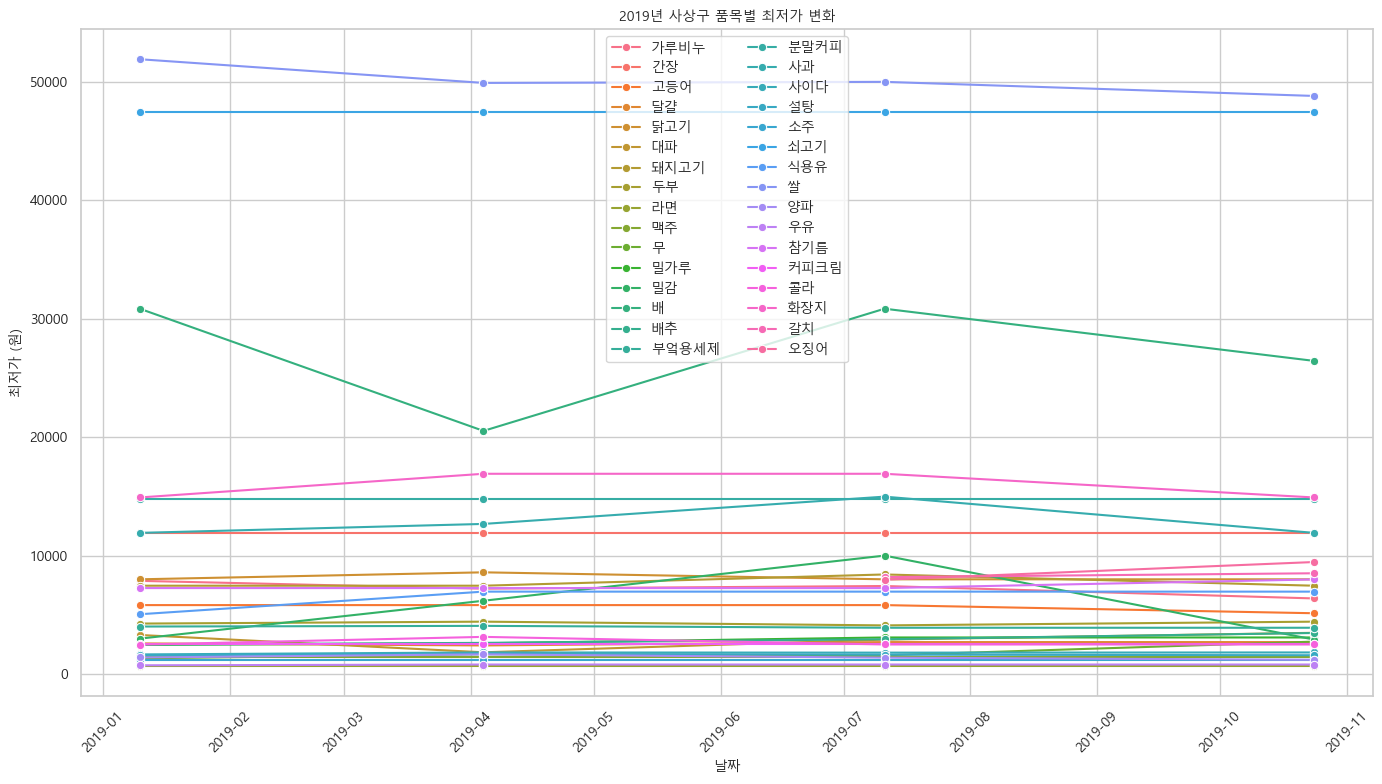

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("사상구2019_1q.csv")
q2 = pd.read_csv("사상구2019_2q.csv")
q3 = pd.read_csv("사상구2019_3q.csv")
q4 = pd.read_csv("사상구2019_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2019년 사상구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("사상구2019_min.csv", index=False, encoding="utf-8-sig")

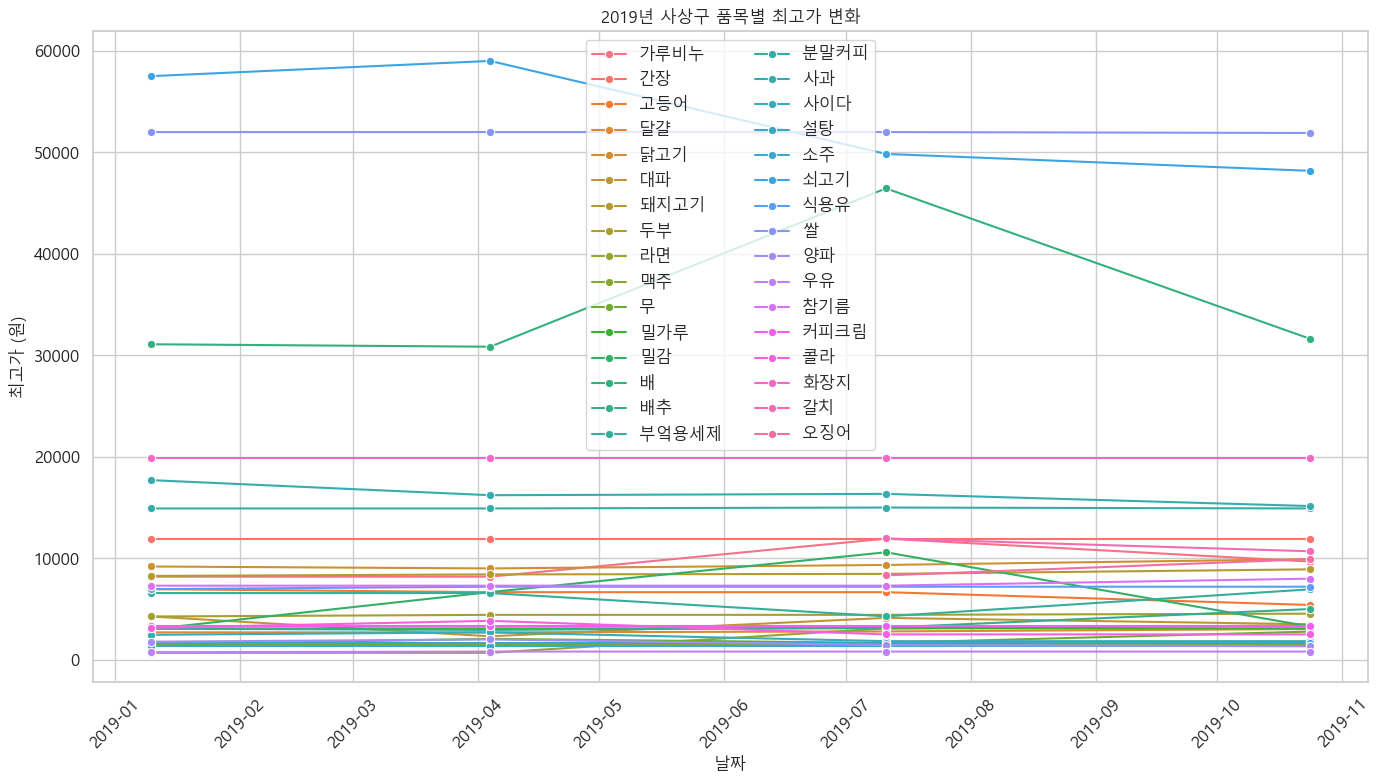

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("사상구2019_1q.csv")
q2 = pd.read_csv("사상구2019_2q.csv")
q3 = pd.read_csv("사상구2019_3q.csv")
q4 = pd.read_csv("사상구2019_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2019년 사상구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("사상구2019_max.csv", index=False, encoding="utf-8-sig")